# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [2]:
# If you haven't installed it

# import matplotlib.pyplot as plt
# import numpy as np 
# import pandas as pd
# from numpy import genfromtxt

# from sklearn.datasets import fetch_openml

# X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# pd.DataFrame(X).to_csv("X_mnist.csv", index=False)
# pd.DataFrame(y).to_csv("y_mnist.csv", index=False)

In [143]:
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import genfromtxt

# since it's already downloaded, read it in 
X = genfromtxt('X_mnist.csv', delimiter=',')
y = genfromtxt('y_mnist.csv', delimiter=',')
X=X[1:]
y=y[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [144]:
# Using 20% of the dataset

# separate datasets
X_train_set = X_train[0:int(X_train.shape[0]*0.2),  :]
X_test_set = X_test[0:int(X_test.shape[0]*0.2),  :]
y_train_set = y_train[0:int(y_train.shape[0]*0.2)]
y_test_set = y_test[0:int(y_test.shape[0]*0.2)]

# Combine the training and testing
X_sub = np.concatenate((X_train_set, X_test_set))
y_sub = np.concatenate((y_train_set, y_test_set))

b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

In [145]:
# writing a function to train a knn model specifying k neighbors 

from IPython.core.pylabtools import figsize
from sklearn.neighbors import KNeighborsClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline


def knn_model(X_train, Y_train, X_test, Y_test, k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, Y_train)
    Y_test_predictions = knn.predict(X_test)
    return knn,Y_test_predictions


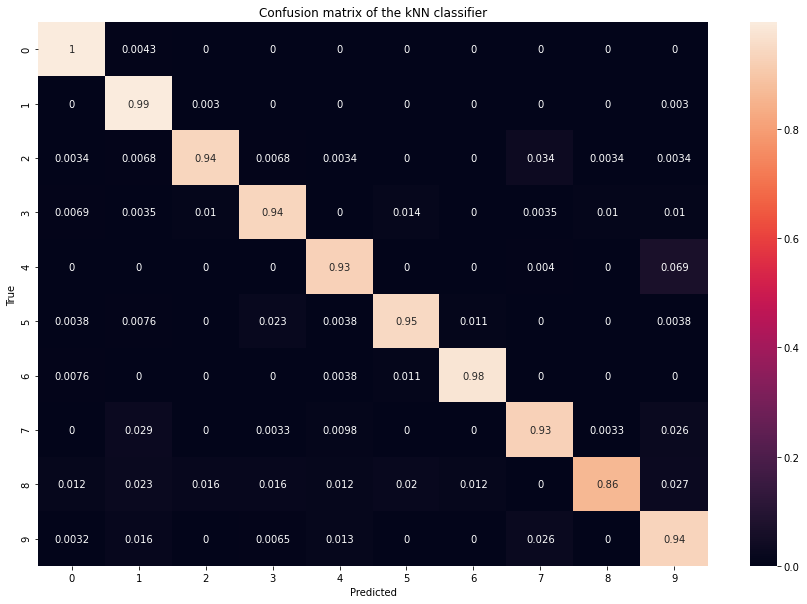

In [146]:
model_b,Y_test_predictions_b=knn_model(X_train_set, y_train_set,X_test_set, y_test_set, 3)

# Plot a confusion matrix
fig = plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test_set, Y_test_predictions_b, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the kNN classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The model performed really well with very high accuracy scores when comparing the predicted versus the actual values. The classes that were most confused are 1 and 2, 3 and 5, 3 and 8, 4 and 7, 5 and 6, 6 and 8, 3 and 7, 8 and 9, 7 and 9, 3 and 9. 

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

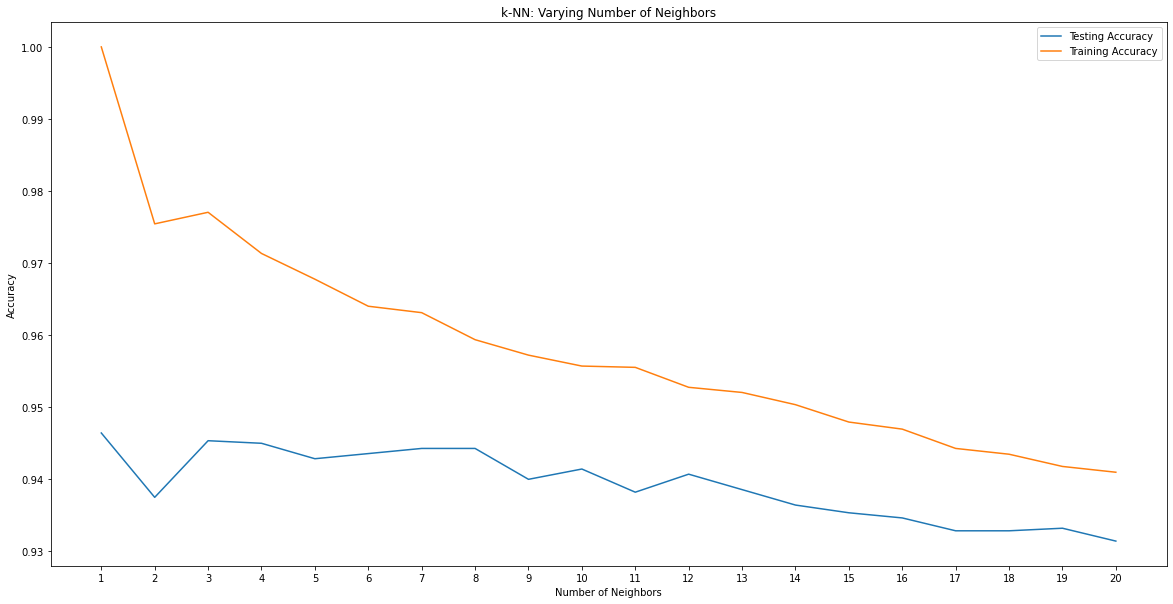

In [147]:
from sklearn.metrics import accuracy_score

no_neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train_set,y_train_set)
    
    y_pred = knn.predict(X_test_set)
    # Use the below for train Accuracy 
    y_train_pred = knn.predict(X_train_set)
    train_accuracy[i] = accuracy_score(y_train_pred, y_train_set)
    #or use this commented line below
#     train_accuracy[i] = knn.score(X_train_set, y_train_set)

    # Compute accuracy on the testing set
    test_accuracy[i] = accuracy_score(y_pred, y_test_set)
    


# Visualization of k values vs accuracy
fig = plt.figure(figsize = (20,10))
plt.xticks(np.arange(1,21))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

K=5 is optimal because the testing curve seems to stabilize and is close to the maximum testing accuracy achieved at k=3. For the next model I choose k=5; but k=3,4 or 5 should produce similar results.

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

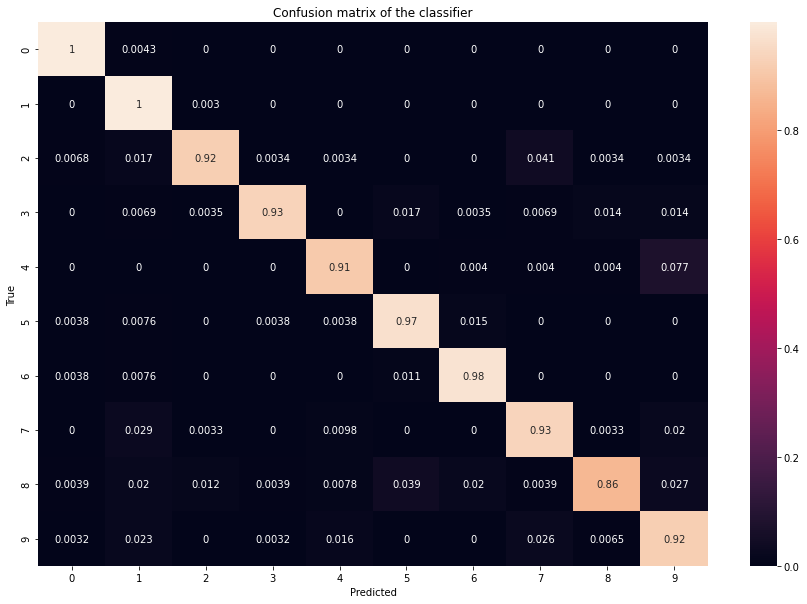

In [148]:
model_d,Y_test_predictions_d=knn_model(X_train_set, y_train_set,X_test_set, y_test_set, 5)

# Plot a confusion matrix
fig = plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test_set, Y_test_predictions_d, normalize ='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix at k=5 is similar to k=3. This is what was expected because we see a maximum of the testing accuracy at k=3, but at k=5, we see that the testing accuracy seems to stabilise at that point. The classes with the most confusion also match. For instance, we can see 3 and 9. But we see different classes that have more confusion in k=5 when compared to k=3 like 0 and 8, 4 and 9 etc. 

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


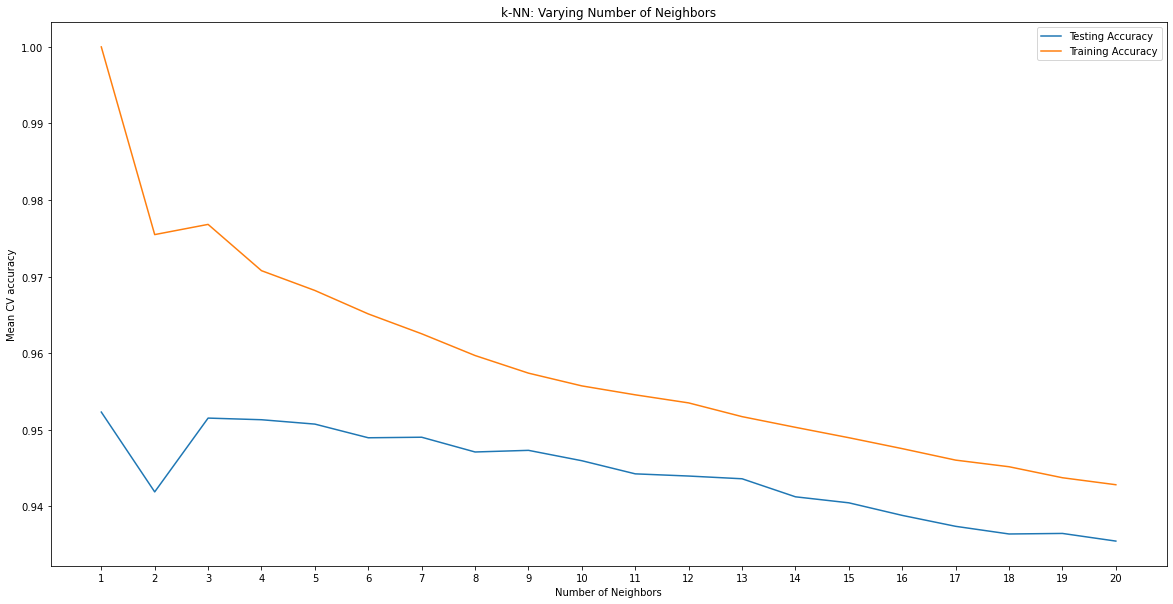

In [149]:
from sklearn.model_selection import cross_validate
import numpy as np

#create a new KNN model
no_neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
for i, k in enumerate(no_neighbors):
    print(i)
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    #train model with cv of 10
    cv_scores = cross_validate(knn_cv, X_sub , y_sub , cv = 10, return_train_score=True)
    train_accuracy[i] = np.mean(cv_scores['train_score'])
    test_accuracy[i] = np.mean(cv_scores['test_score'])
    
fig = plt.figure(figsize = (20,10))
plt.xticks(np.arange(1,21))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV accuracy')
plt.show()

Based on the mean CV accuracy, K=5 seems to be optimal. The graph generated in e) versus c) seems to be similar in terms of training and testing accuracy for different K. This tells us that our data necessarily didn't need cross validation, but it is a good practice. By using Cross-Validation, we are able to get more metrics and draw important conclusion about our algorithm and our data.

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

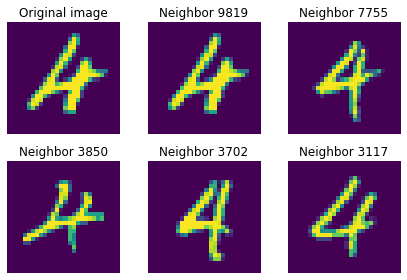

In [150]:
# Best model is 5 nearest neighbour
# do a random pick using random library - give a range of 1-70,000 

# Calculate the difference between X and the selected image

import random
from sklearn.neighbors import KNeighborsClassifier

from itertools import chain

def plot_k_neighbors(model, X, rand_num, k):
    
    neighbors = model.kneighbors(X[[rand_num]], n_neighbors=k)

    indices=list(chain.from_iterable(neighbors[1]))
    indices.insert(0, rand_num)

    rows = 2
    cols = 3
    axes=[]
    fig=plt.figure(figsize = (cols*2,rows*2))


    for i,n in enumerate(indices):
        ax = fig.add_subplot(rows, cols, i+1)
        axes.append(ax)
        if i==0:
            plt.imshow(X[[n]].reshape(28,28))
            plt.title('Original image')
        
        else:
            plt.imshow(X[[n]].reshape(28,28))
            plt.title('Neighbor {}'.format(n))
        plt.axis('off')
            
    fig.tight_layout()    
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    plt.show()
    

#generating a random number to pick an image at random 
random_num = random.randint(0,len(X_train_set)-1)

result=plot_k_neighbors(model_d, X_train_set, random_num, 5)


g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

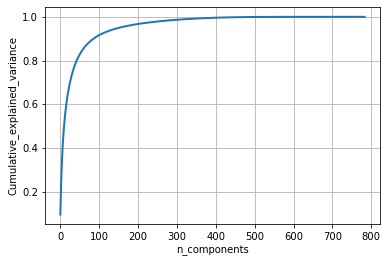

In [154]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution 
pca.n_components = 784
pca_data = pca.fit_transform(X_sub)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Dimensions were chosen based on this plot. As we can see, about 100 components explain about ~90% of the variance. So we can reduce the dimension according to the required variance.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


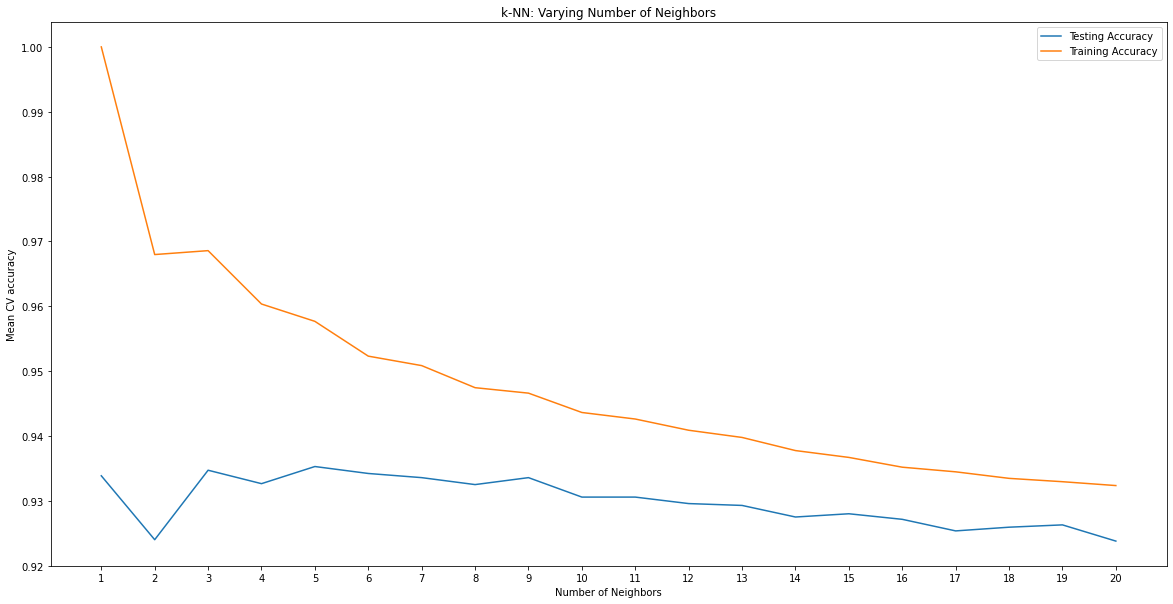

In [167]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca = PCA(n_components=100)
knn = KNeighborsClassifier()
model = make_pipeline(scaler, pca, knn)


#create a new KNN model
no_neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    print(i)
    model.set_params(kneighborsclassifier__n_neighbors=k)
    knn_cv = model.fit(X_sub, y_sub)
    #train model with cv of 10
    cv_scores = cross_validate(knn_cv, X_sub , y_sub , cv = 10, return_train_score=True)
    train_accuracy[i] = np.mean(cv_scores['train_score'])
    test_accuracy[i] = np.mean(cv_scores['test_score'])

    
fig = plt.figure(figsize = (20,10))
plt.xticks(np.arange(1,21))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean CV accuracy')
plt.show()

The model in e) is pretty similar to the model we constructed in g) in terms of shape. The significant difference in the e) and g) graphs is that the mean CV accuracy in e) is a bit higher than that of g) for training and testing accuracy at different number of neighbors K. For instance at k=5, we can see that the training accuracy in e) is around 0.968 and in g) it is around 0.955. The testing accuracy in e) is 0.95 and in g) it is 0.935. This may be due to the fact that we have applied dimension reduction and so we might need to compromise on the accuracy a bit, but in turn, we have a 100 components that can explain 90% of the variance and we don't need to take all the 784 components!

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [321]:
import pandas as pd
df = pd.read_csv('/Users/preshitadave/Documents/Boston/BU/Spring/CS506/homework-4-PreshitaDave/titanic/train.csv')

def drop_na(df):
    cols_dropped = []

    for (columnName, columnData) in df.iteritems():
        if sum(columnData.isnull()) > 200:
            cols_dropped.append(columnName)
    df_dropped = df.drop(columns = cols_dropped)
    return df_dropped

df = drop_na(df) 

def replace_with_mean(df):
    mean_age = df['Age'].mean()
    df['Age']=df['Age'].fillna(mean_age)
    return df

df = replace_with_mean(df)

def to_numerical(df):
    df['Sex'].replace(['female','male'],[1,0],inplace=True)
    return df['Sex']

df['Sex'] = to_numerical(df)


Along with the missing data, some processing on the dataset has also been performed for easier handling later on. Any columns which have more than 200 NaN values have been dropped. Missing values in the Age column have been replaced with the mean age. Also, male and female in the Sex column have been replaced with 0 and 1 respectively. 

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [322]:
def extract_names(df):
    names = df['Name'].to_list()

    first_name = []
    middle_name = []
    last_name = []
    title = []

    for name in names:
        last_name.append(name.split(',')[0])
        title.append(name.split(',')[1].split('.')[0][1:])
        leftover_name = name.split(',')[1].split('.')[1].split(' ')
        first_name.append(leftover_name[1])
        if len(leftover_name) >= 3:
            middle_name.append(leftover_name[2])
        else:
            middle_name.append('')
        
    new_df = pd.DataFrame()
    new_df['first_name'] = pd.Series(first_name)
    new_df['middle_name'] = pd.Series(middle_name)
    new_df['last_name'] = pd.Series(last_name)
    new_df['title'] = pd.Series(title)
    return new_df 

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df1 = pd.DataFrame(encoder.fit_transform(df[['Title']]).toarray())


encoder_df1.columns = list(df['Title'].unique())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df1)

final_df.drop('Title', axis=1, inplace=True)


encoder_df2 = pd.DataFrame(encoder.fit_transform(df[['Pclass']]).toarray())

encoder_df2.columns = ['Pclass1', 'Pclass2', 'Pclass3']

# merge one-hot encoded columns back with original DataFrame
final_df = final_df.join(encoder_df2)

final_df.drop('Pclass', axis=1, inplace=True)


Added the Title and the Passenger class (Pclass) columns as 2 new categorical features because based on HW1, they do seem to play a role in the survival of the passenger and need to be explored. Categorical data are represented by the One-hot encoded method.

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

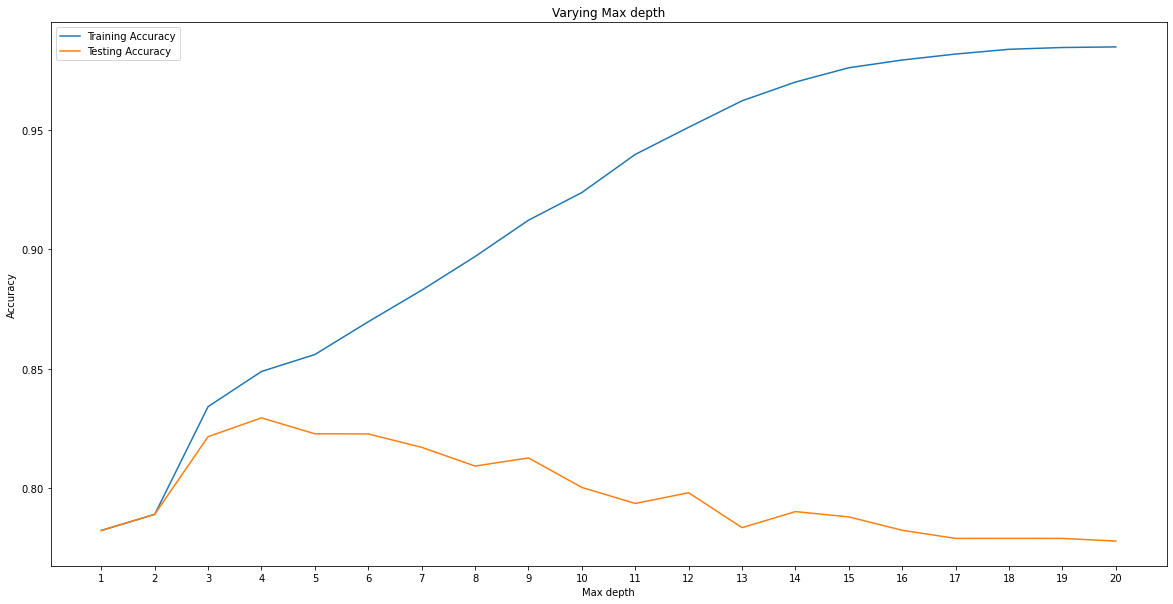

In [393]:
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import accuracy_score#for visualizing tree 
from sklearn.tree import plot_tree


final_df_removed=final_df.drop(['PassengerId','Name','Ticket','Embarked', 'First Name', 'Middle Name', 'Last Name'], axis=1)
# check if any columns contain null values
final_df_removed.isnull().any()

y = final_df_removed['Survived']

X = final_df_removed.drop('Survived', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)

no_neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

    
for i, k in enumerate(no_neighbors):

    # Defining the decision tree algorithm
    dtree=DecisionTreeClassifier(max_depth=k)
    #train model with cv of 10
    cv_scores = cross_validate(dtree, X , y , cv = 10, return_train_score=True)
    train_accuracy[i] = np.mean(cv_scores['train_score'])
    test_accuracy[i] = np.mean(cv_scores['test_score'])
    

fig = plt.figure(figsize = (20,10))
plt.xticks(np.arange(1,21))
plt.title('Varying Max depth')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

Based on the plot, we choose max_depth as 4 because the testing accuracy seems to stabilise around that point (around 0.83) without dipping too much and without overfitting as well. Max_depth determines the maximum depth of the tree. The default value is set to none. This will often result in over-fitted decision trees.

In [388]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

Before the decision tree classifier was run, the following features were removed: PassengerId (The number has no siginificance to survival, it's just a unique ID), Name (because the important parameter Title was extracted), Ticket (acts as a Unique ID), Embarked (port of Embarking the ship wouldn't make a difference if one survived or not). First, middle and last name were also removed because they were extracted from Name and only the Title is useful for us.  

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

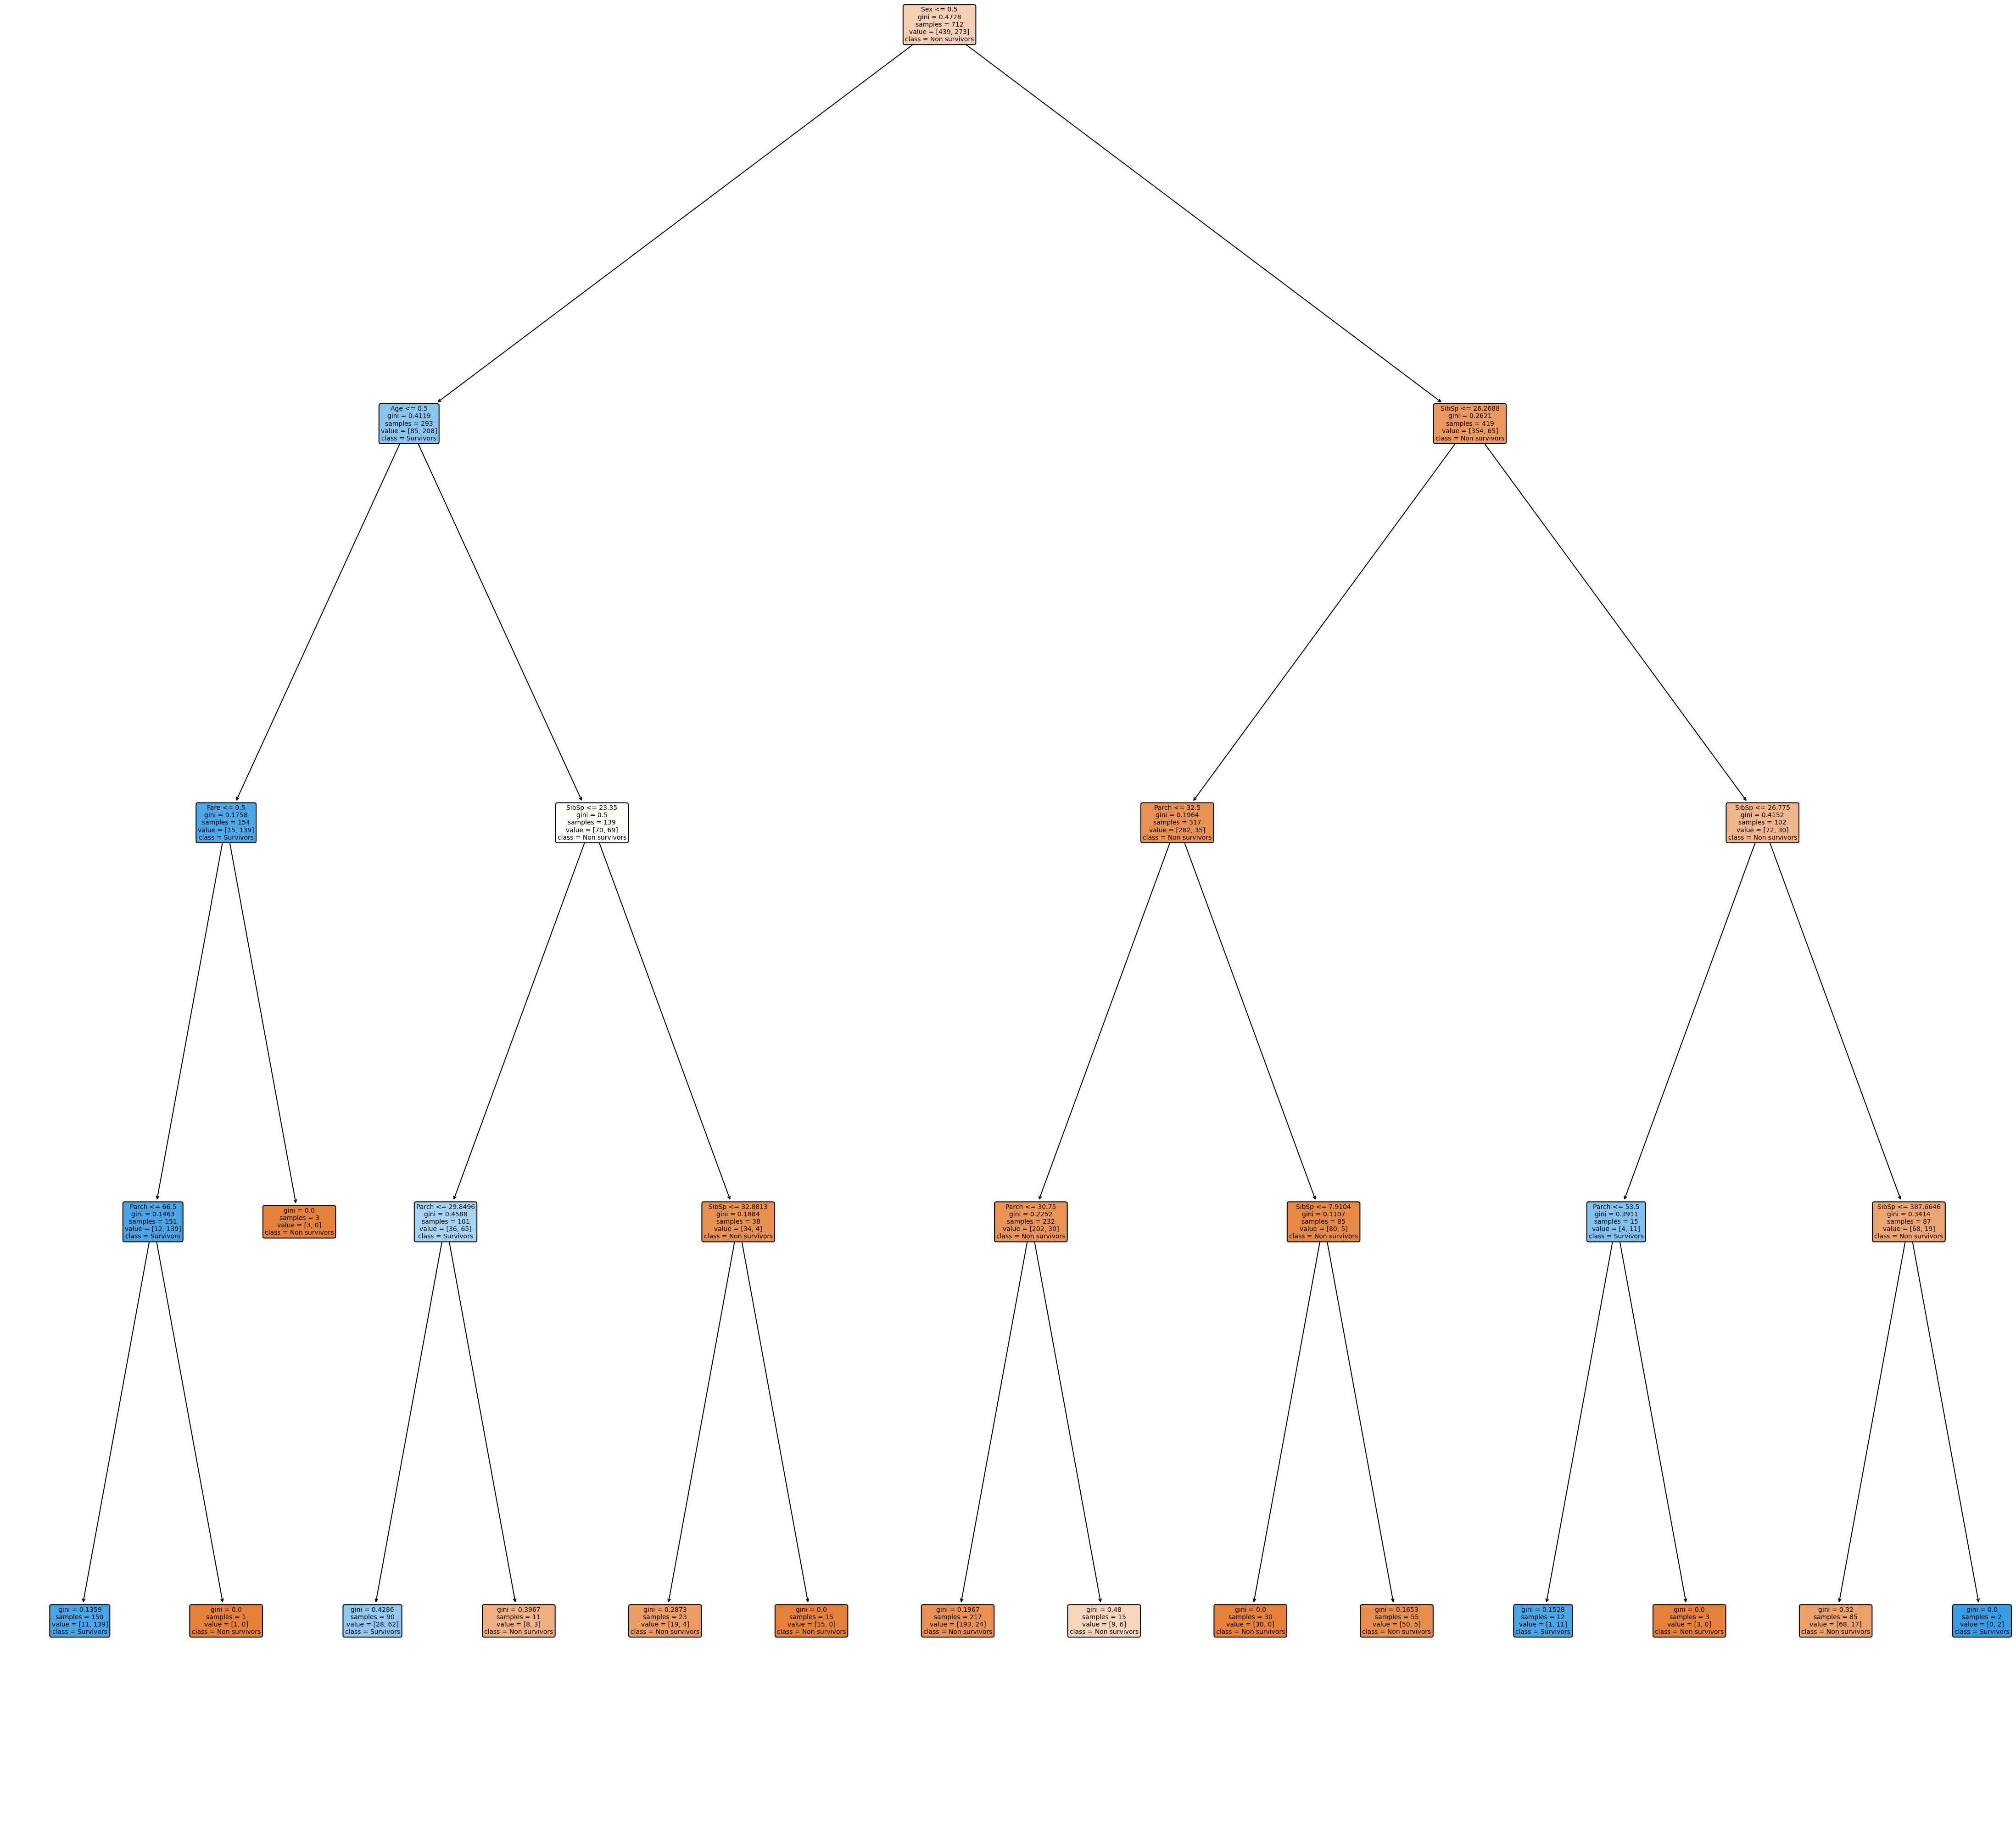

In [439]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text


fig=plt.figure(figsize=(20,20), dpi=144)

dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =["Non survivors", "Survivors"] , filled = True , precision = 4, rounded = True)

# fig.savefig("decistion_tree.png")

# text_representation = export_text(dec_tree)
# with open("decistion_tree.log", "w") as fout:
#     fout.write(text_representation)

A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. On each step or node of a decision tree used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a 
question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

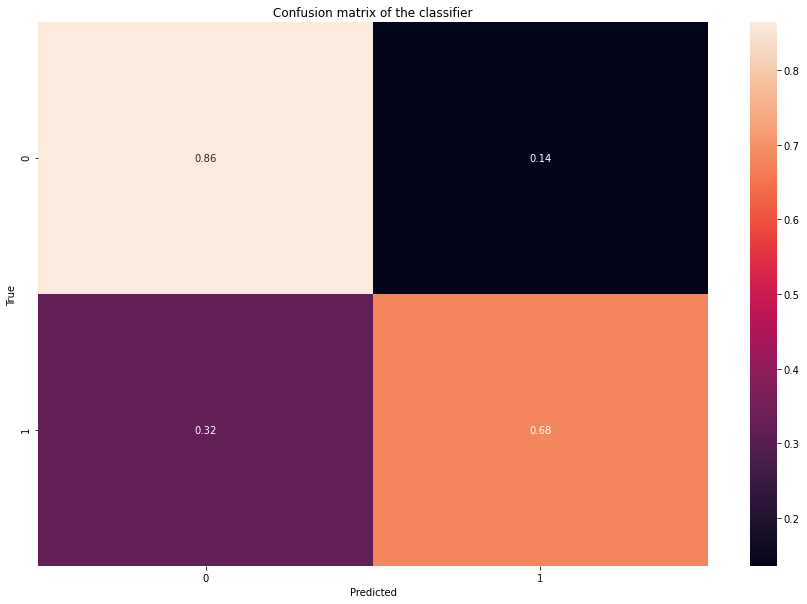

In [358]:
fig = plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test, y_pred, normalize ='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Let us look at 2 examples to understand the pitfalls of the model

In [380]:
# looking at the misclassified data in the test set
y_test_df=pd.DataFrame(y_test)
y_test_df['pred'] = y_pred

misclassified_df = y_test_df[y_test_df['Survived'] != y_test_df['pred']]
misclassified_df.head()

,Survived,pred
298,1,0
484,1,0
14,0,1
474,0,1
55,1,0


Based on the misclassified df, we take index 298 and 14 in the test dataset. We will look at the features of these indices in the X_test dataset.

In [378]:
# survived but predicted as non-survivor
ex1=X_test.loc[298]
ex1

Sex              0.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            30.500000
Mr               0.000000
Mrs              0.000000
Miss             0.000000
Master           0.000000
Don              0.000000
Rev              0.000000
Dr               0.000000
Mme              0.000000
Ms               0.000000
Major            0.000000
Lady             0.000000
Sir              1.000000
Mlle             0.000000
Col              0.000000
Capt             0.000000
the Countess     0.000000
Jonkheer         0.000000
Pclass1          1.000000
Pclass2          0.000000
Pclass3          0.000000
Name: 298, dtype: float64

Sir is root node and it splits between survivor and non-survivor. If Sir being 1, it is a non-survivor according to the decision tree. In this example,it is a Sir who survived and thus this is misclassified. 

In [379]:
# non-survivor predicted as survivor
ex2=X_test.loc[14]
ex2

Sex              1.0000
Age             14.0000
SibSp            0.0000
Parch            0.0000
Fare             7.8542
Mr               0.0000
Mrs              0.0000
Miss             0.0000
Master           0.0000
Don              0.0000
Rev              0.0000
Dr               0.0000
Mme              0.0000
Ms               1.0000
Major            0.0000
Lady             0.0000
Sir              0.0000
Mlle             0.0000
Col              0.0000
Capt             0.0000
the Countess     0.0000
Jonkheer         0.0000
Pclass1          0.0000
Pclass2          0.0000
Pclass3          1.0000
Name: 14, dtype: float64

In this example, a Ms didn't survive and Sir is also 0. Hence, the person got classified as a survivor even though the person didn't survive. 

The pitfalls of using decision trees are that a single decision tree tends to overfit the data which can be solved by setting constraints on model parameters i.e. height of the tree and pruning. It is also not a great fit for continuous data - It looses some of the information associated with numerical variables when it classifies them into different categories. For our data, it could be the Age feature. 

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

In [434]:
# Hyperparameter training through gridsearchcv
from sklearn.model_selection import GridSearchCV
param_dict = {"max_depth":range(1,11),"min_samples_split":np.linspace(0.1,1,10),"max_features":list(range(1,X_train.shape[1]))}
grid = GridSearchCV(dtree, param_grid=param_dict, cv=10, scoring='accuracy', n_jobs=-1, error_score='raise', verbose=1)
grid.fit(X_train,y_train)


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy', verbose=1)

In [435]:
print(grid.best_params_)

{'max_depth': 5, 'max_features': 4, 'min_samples_split': 0.1}


In [436]:
print(grid.best_score_)

0.8441118935837245


Grid search is a technique for tuning hyperparameters that may facilitate building and evaluating a model for every combination of algorithms parameters per grid. 10 fold cross-validation is used to search the best value for that tuning hyperparameter. In the Grid Search, all the mixtures of hyperparameters combinations will pass through one by one into the model and check the score on each model. It gives us the set of hyperparameters which gives the best score. Below are the hyperparameters that we tuned for:

max_depth determines the maximum depth of the tree. The default value is set to none. This will often result in over-fitted decision trees. According to the model, max_depth is 5, similar to what we got before. 

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. According to the model, min_samples_split  is 10% of the data. This prevents overfitting of the model. 

max_features represents the number of features to consider when looking for the best split. According to the model, we should consider around 4 features for splitting at every node, which more or less seems to agree with what we have found in the next part while using feature_importances_. 

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

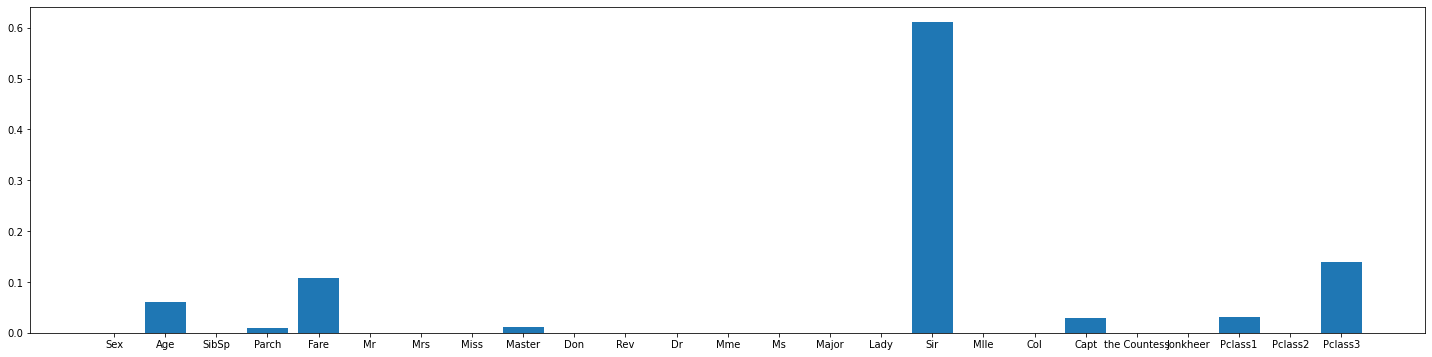

In [389]:
importance = dtree.feature_importances_
fig, ax = plt.subplots(figsize = (25,6))
plt.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(25))
ax.set_xticklabels(X.columns)
plt.show()

Based on this plot, we can consider the features: Sir, Pclass3, Fare, Age and Capt. These seem to agree with the features that were used to plot the decision tree in d). 

In [401]:
reduced_X = X[['Sir','Pclass3','Fare','Age','Capt']]
X_train, X_test, y_train, y_test = train_test_split(reduced_X , y, test_size = 0.2, random_state = 0)
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

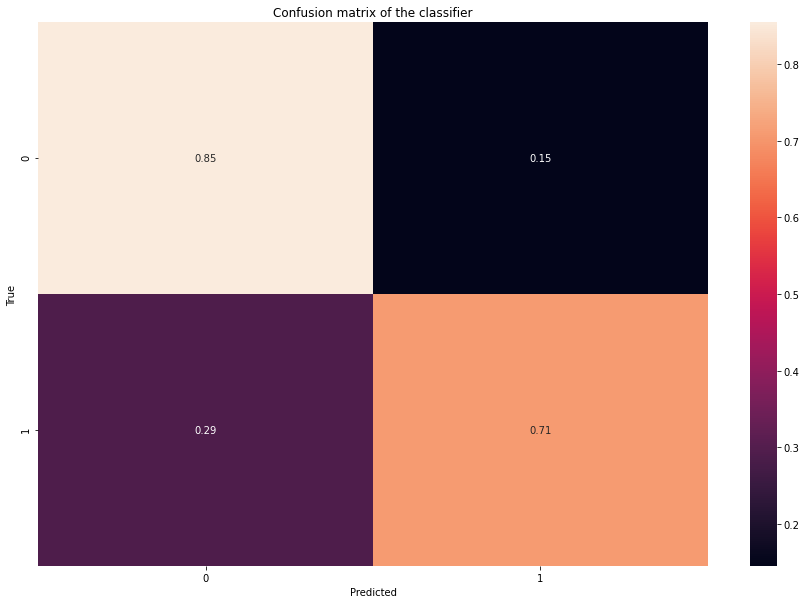

In [402]:
fig = plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test, y_pred, normalize ='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The performance of the model has increased. The true negative score is more than that in e) and the false negative score has also reduced.  This model is easily interpretable as compared to a black box model because it tells us which features are used to split the nodes. They are also accurate considering the number of features are small. It tell us that women survived more than compared to men cause chivalry ain't dead that time. 

# Bonus (40 Points)

## Random Forests
 Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 
 
 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model (10 points)

In [264]:
from sklearn import tree

# Here is suggested template for you to use
# But feel free to do something different
class Random_Forest():

    def __init__(self, num_trees, max_depth, criterion):
        self.max_depth = max_depth
        self.criterion = criterion
        self.decision_trees = [tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(predictions):
        # your code here
        return 
    
    def predict(self, X_test, y_test):
        # your code here

        return self._majority(predictions)



### Hyperparameter tuning, and model evaluation for random forests. (25 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

In [ ]:
# write your code here
tree_size = [5,10,15]
num_trees = [10,50,100,500,1000]
criteria = ['gini index', 'entropy']

### Calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 


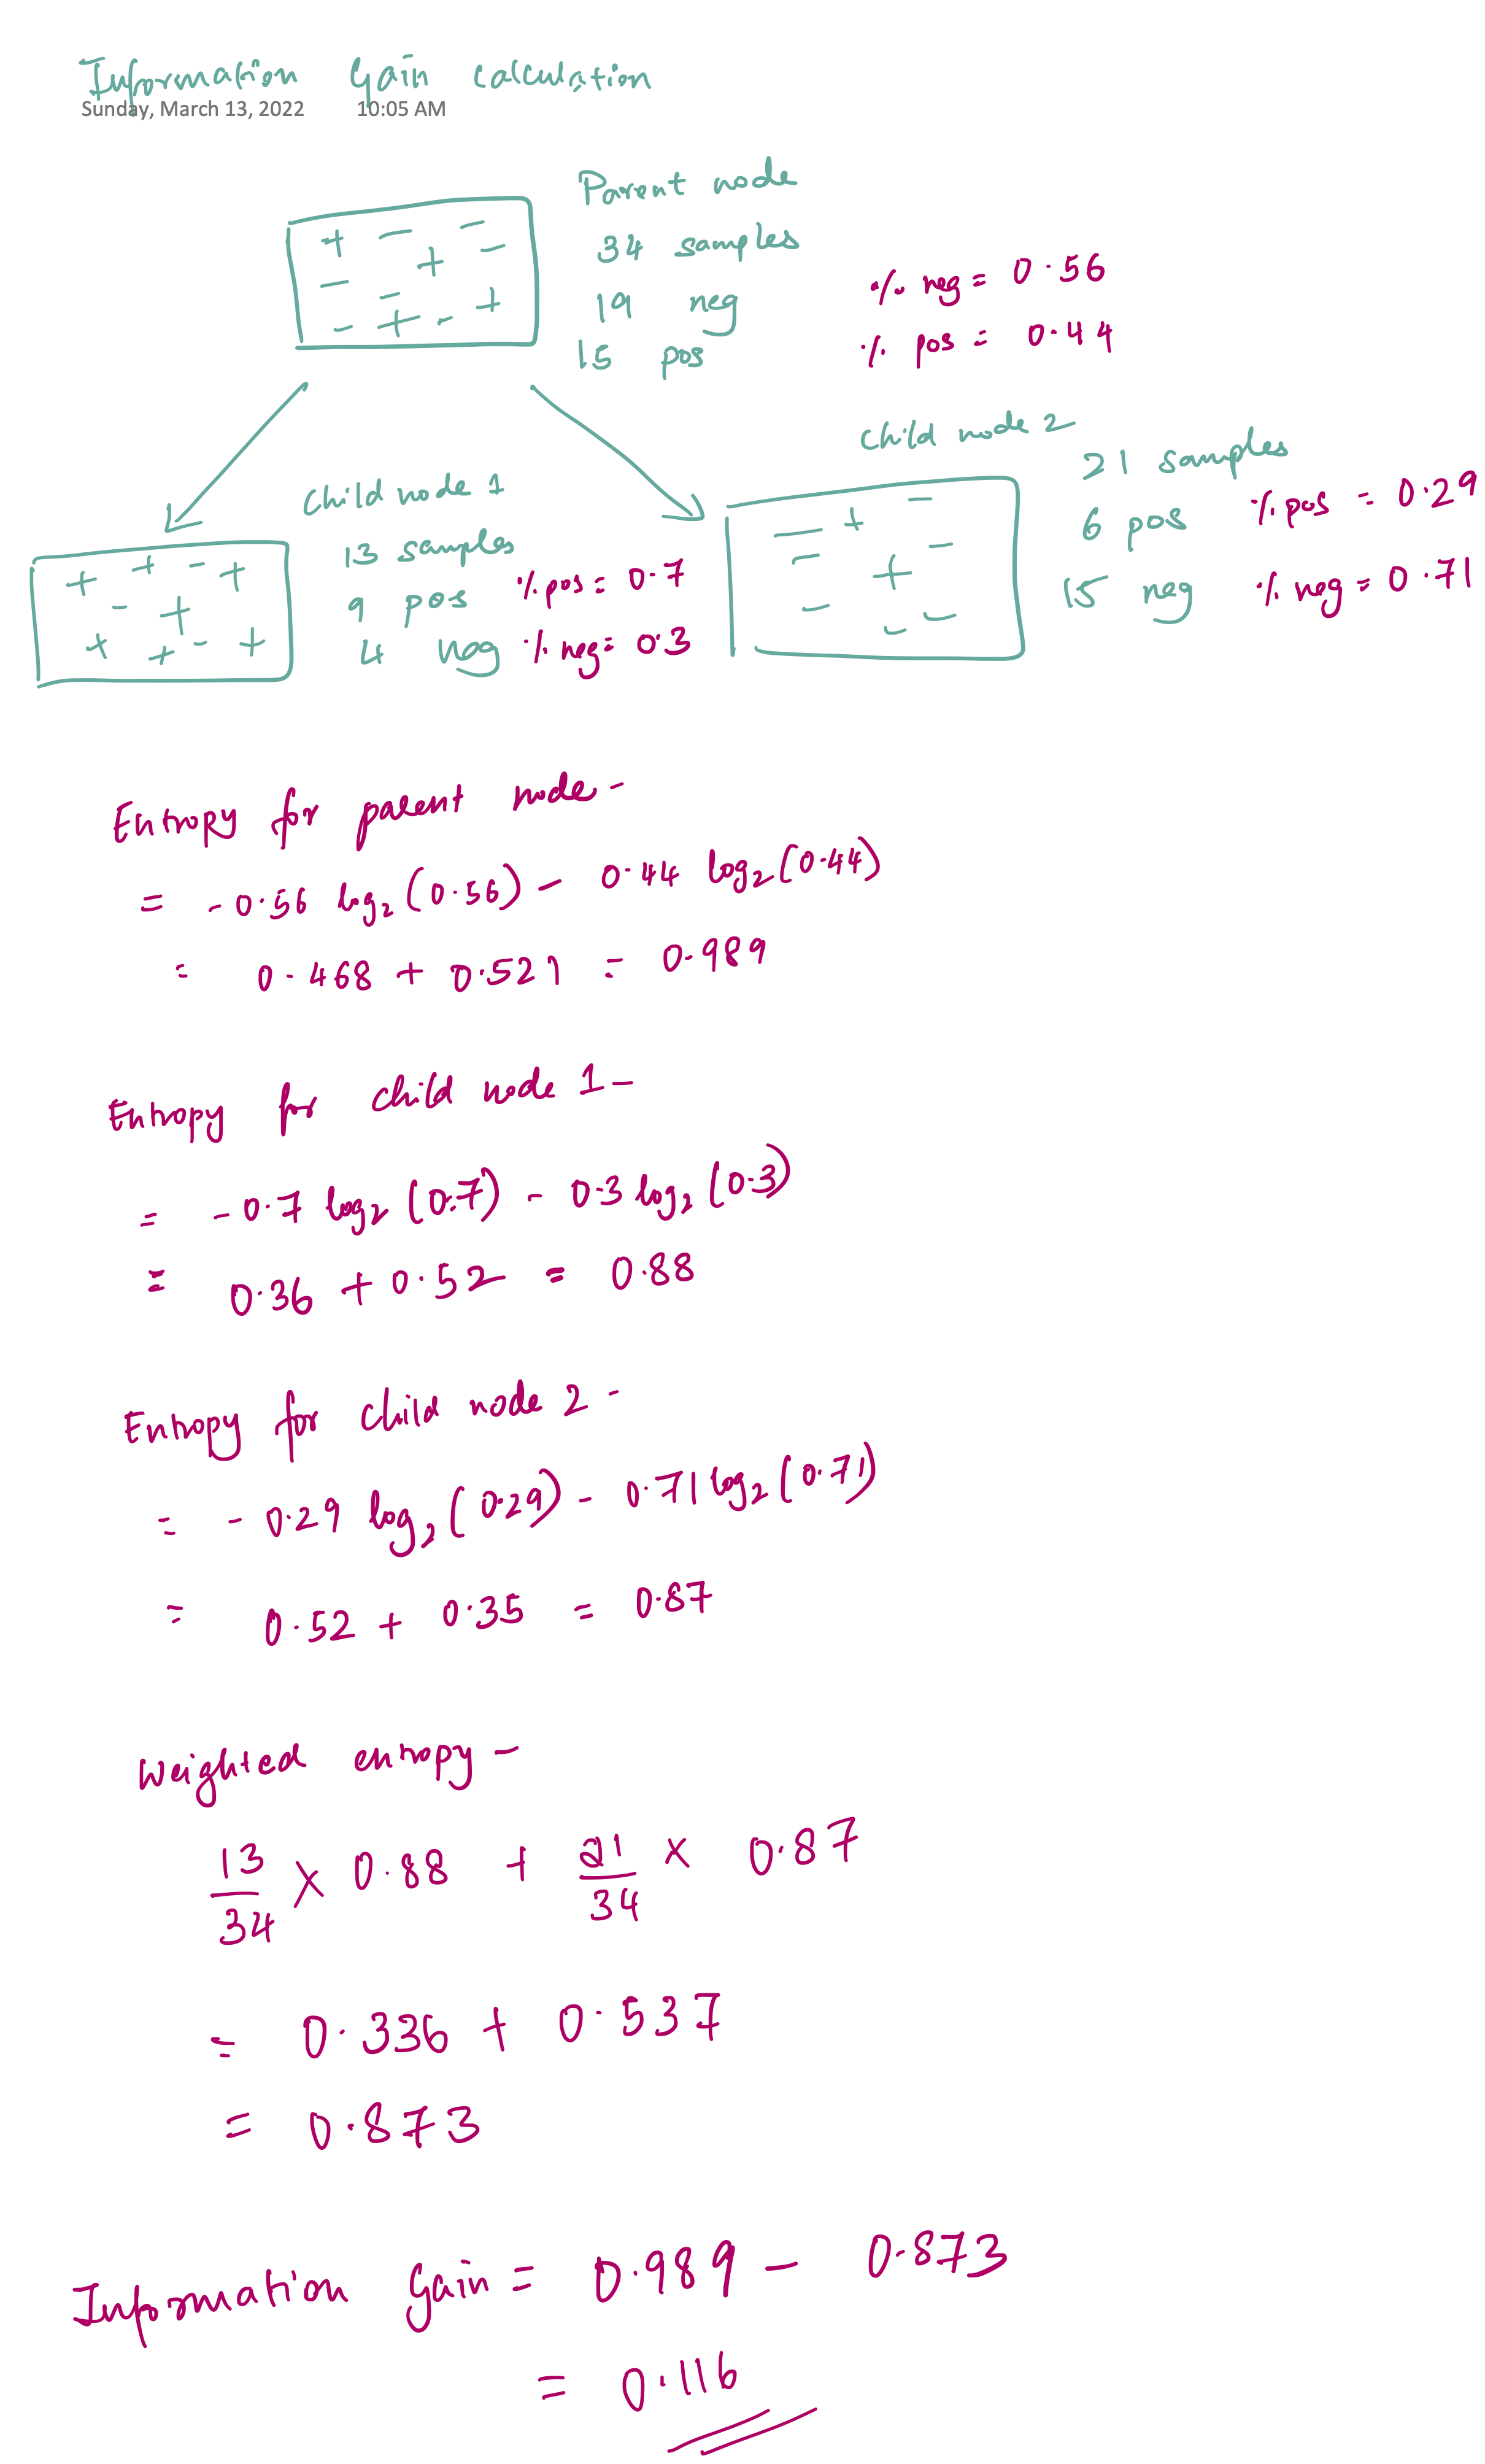